In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data2 = {
    'Date': pd.date_range(start='2023-01-01', periods=10),
    'Product_A': [120, 150, 130, 110, 140, 160, 135, 125, 145, 155],
    'Product_B': [90, 110, 100, 80, 95, 105, 98, 88, 102, 112],
    'Product_C': [75, 80, 85, 70, 88, 92, 78, 82, 87, 90]
}
df2 = pd.DataFrame(data2)
df2

,Date,Product_A,Product_B,Product_C
0,2023-01-01,120,90,75
1,2023-01-02,150,110,80
2,2023-01-03,130,100,85
3,2023-01-04,110,80,70
4,2023-01-05,140,95,88
5,2023-01-06,160,105,92
6,2023-01-07,135,98,78
7,2023-01-08,125,88,82
8,2023-01-09,145,102,87
9,2023-01-10,155,112,90


In [6]:
# Exercise 1: Calculate the total sales for each product.
df2[['Product_A','Product_B','Product_C']].sum()

Product_A    1370
Product_B     980
Product_C     827
dtype: int64

In [19]:
# Exercise 2: Find the date with the highest total sales.
# df2.set_index('Date').sum(axis=1).nlargest(1)
total_sales = df2.set_index('Date').sum(axis=1)
max_val = total_sales.max()

total_sales[total_sales == max_val]

Date
2023-01-06    357
2023-01-10    357
dtype: int64

In [ ]:
# Exercise 3: Calculate the percentage change in sales for each product from the previous day.
df = df2.set_index('Date')
a = df['Product_A'].shift(1)
b = df['Product_B'].shift(1)
c = df['Product_C'].shift(1)
df['change_A'] = ((df['Product_A'] - a) / a * 100).round(2)
df['change_B'] = ((df['Product_B'] - b) / b * 100).round(2)
df['change_C'] = ((df['Product_C'] - c) / c * 100).round(2)

df

,Product_A,Product_B,Product_C,change_A,change_B,change_C
Date,,,,,,
2023-01-01,120,90,75,NaN,NaN,NaN
2023-01-02,150,110,80,25.00,22.22,6.67
2023-01-03,130,100,85,-13.33,-9.09,6.25
2023-01-04,110,80,70,-15.38,-20.00,-17.65
2023-01-05,140,95,88,27.27,18.75,25.71
2023-01-06,160,105,92,14.29,10.53,4.55
2023-01-07,135,98,78,-15.62,-6.67,-15.22
2023-01-08,125,88,82,-7.41,-10.20,5.13
2023-01-09,145,102,87,16.00,15.91,6.10


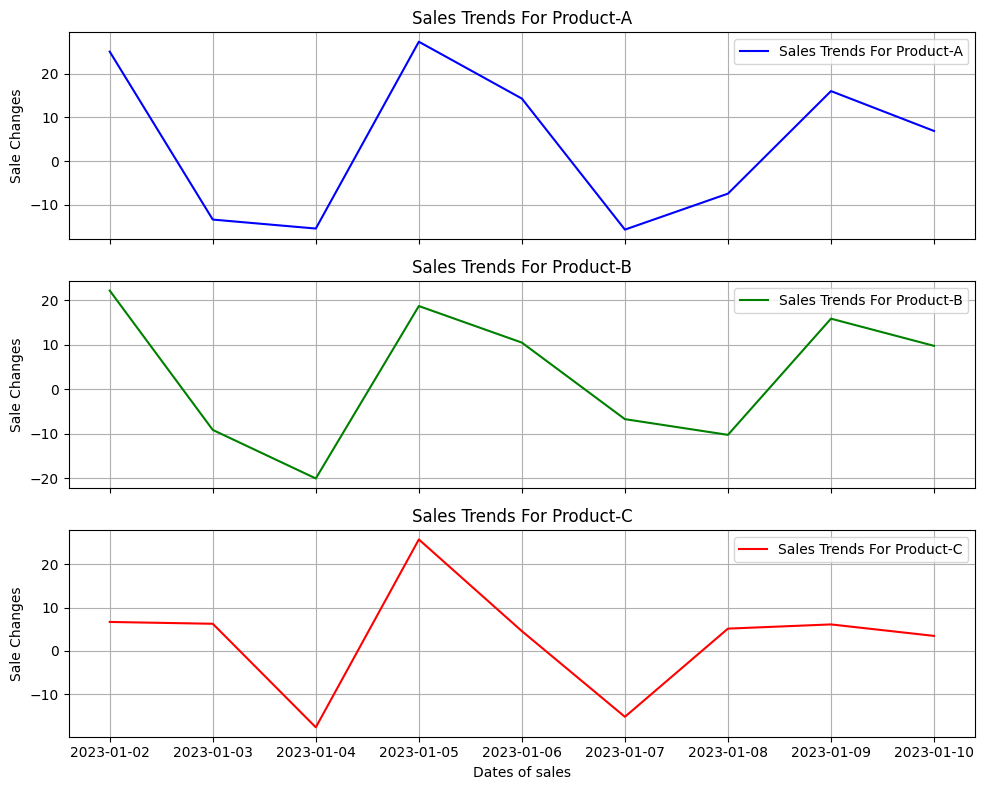

In [65]:
# Exercise 4: Plot a line chart to visualize the sales trends for each product over time.
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)  # 3 rows, 1 column

axes[0].plot(df.index, df['change_A'], label='Sales Trends For Product-A', color='b')
axes[0].set_ylabel('Sale Changes')
axes[0].set_title('Sales Trends For Product-A')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(df.index, df['change_B'], label='Sales Trends For Product-B', color='g')
axes[1].set_ylabel('Sale Changes')
axes[1].set_title('Sales Trends For Product-B')
axes[1].legend()
axes[1].grid(True)

axes[2].plot(df.index, df['change_C'], label='Sales Trends For Product-C', color='r')
axes[2].set_xlabel('Dates of sales')
axes[2].set_ylabel('Sale Changes')
axes[2].set_title('Sales Trends For Product-C')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
